In [3]:
# importing important libraries
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import metrics
import matplotlib.pyplot as plt

In [4]:
# importing the data
df=pd.read_csv('Mall_Customers_BP.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# getting an idea about NULL values
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
# getting an idea about the data types of the columns
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
# standard scaling
scaler=StandardScaler()
df[['Annual Income (k$)', 'Spending Score (1-100)']]=scaler.fit_transform(df[['Annual Income (k$)','Spending Score (1-100)']])
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,-1.738999,-0.434801
1,2,Male,21,-1.738999,1.195704
2,3,Female,20,-1.700830,-1.715913
3,4,Female,23,-1.700830,1.040418
4,5,Female,31,-1.662660,-0.395980


In [8]:
# finding the optimal number of clusters

# creating empty list
distortions=[]
inertias=[]
mapping1={}
mapping2={}
K=range(1,15)

# Making a seperate array file
array1=df['Annual Income (k$)'].to_numpy()
array2=df['Spending Score (1-100)'].to_numpy()
array=np.array(list(zip(array1,array2))).reshape(len(array1),2)

for k in K:
    kmeanModel=KMeans(n_clusters=k)
    kmeanModel.fit(array)
    distortions.append(sum(np.min(cdist(array,kmeanModel.cluster_centers_,'euclidean'),axis=1))//array.shape[0])
    
    inertias.append(kmeanModel.inertia_)
    mapping1[k]=sum(np.min(cdist(array,kmeanModel.cluster_centers_,'euclidean'),axis=1))/array.shape[0]
    
    mapping2[k]=kmeanModel.inertia_

D:\programs\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1:1.197935444974564
2:1.0481136557567892
3:0.7501916546715333
4:0.6351847618045524
5:0.5005663590363227
6:0.4656128854953681
7:0.4153355092676809
8:0.3840387439630389
9:0.3586820388842401
10:0.33729957650514725
11:0.3164408238990838
12:0.30888637551151527
13:0.28919827449520286
14:0.2806732987533343


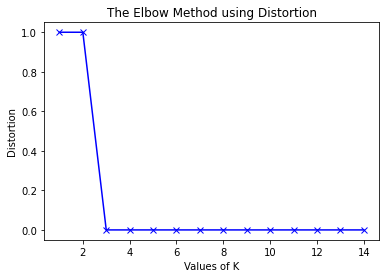

In [9]:
# using distortions 
# tabulating the results

for key,val in mapping1.items():
    print(str(key) + ':' + str(val))
    
# visualizing the result
plt.plot(K,distortions,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title("The Elbow Method using Distortion")
plt.show()

1:399.99999999999994
2:269.01679374906655
3:157.70400815035939
4:108.92131661364358
5:65.56840815571681
6:55.103778121150555
7:46.85522014153859
8:37.19778691869562
9:32.42168353234745
10:29.061152995353442
11:26.02528225341873
12:23.56813259629174
13:21.214319555371304
14:19.18579697720453


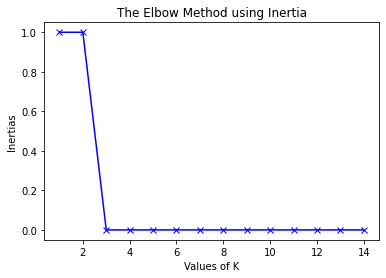

In [10]:
# using inertias -
# tabulating the results

for key,val in mapping2.items():
    print(str(key) + ':' + str(val))
    
# visualizing the result
plt.plot(K,distortions,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertias')
plt.title("The Elbow Method using Inertia")
plt.show()

In [ ]:
# inertia and distortion values are same : but we refer inertia : here we took :->3

In [21]:
# creating the optimal model
data=pd.DataFrame(array,columns=('Annual Income','Spending Score'))

kmeans=KMeans(n_clusters=5).fit(data) # as cluster we get data in last graph
centroids=kmeans.cluster_centers_
print(centroids)

[[-1.32954532  1.13217788]
 [-0.20091257 -0.02645617]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]
 [ 0.99158305  1.23950275]]


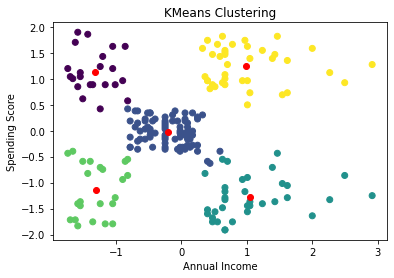

In [22]:
# scatter plot
plt.scatter(data['Annual Income'],data['Spending Score'],c=kmeans.labels_.astype(float))
plt.scatter(centroids[:,0],centroids[:,1],c='red')
plt.xlabel('Annual Income')
plt.ylabel("Spending Score")
plt.title('KMeans Clustering')
plt.show()